<a href="https://colab.research.google.com/github/Niktiru/Weed-Detection-using-YOLOv8/blob/main/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Feb 16 08:49:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.0/715.0 kB 9.4 MB/s eta 0:00:00


In [7]:
from IPython import display
display.clear_output()

In [8]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [9]:
from ultralytics import YOLO

from IPython.display import display, Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/Weed Detection using YOLO

/content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO


In [12]:
!ls


assets	Dataset    fingerprint.pb  keras_metadata.pb  saved_model.pb  Yolov8.ipynb
data	data.yaml  GAN_Weed.ipynb  runs		      variables       yolov8s.pt


In [13]:
%cd /content/drive/MyDrive/Weed Detection using YOLO

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO
100% 21.5M/21.5M [00:00<00:00, 153MB/s]
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None

In [14]:
!ls runs/detect/train2

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1708075750.651b2647efb0.11910.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2340.jpg  val_batch2_pred.jpg
labels.jpg					     train_batch2341.jpg  weights
P_curve.png					     train_batch2342.jpg
PR_curve.png					     train_batch2.jpg


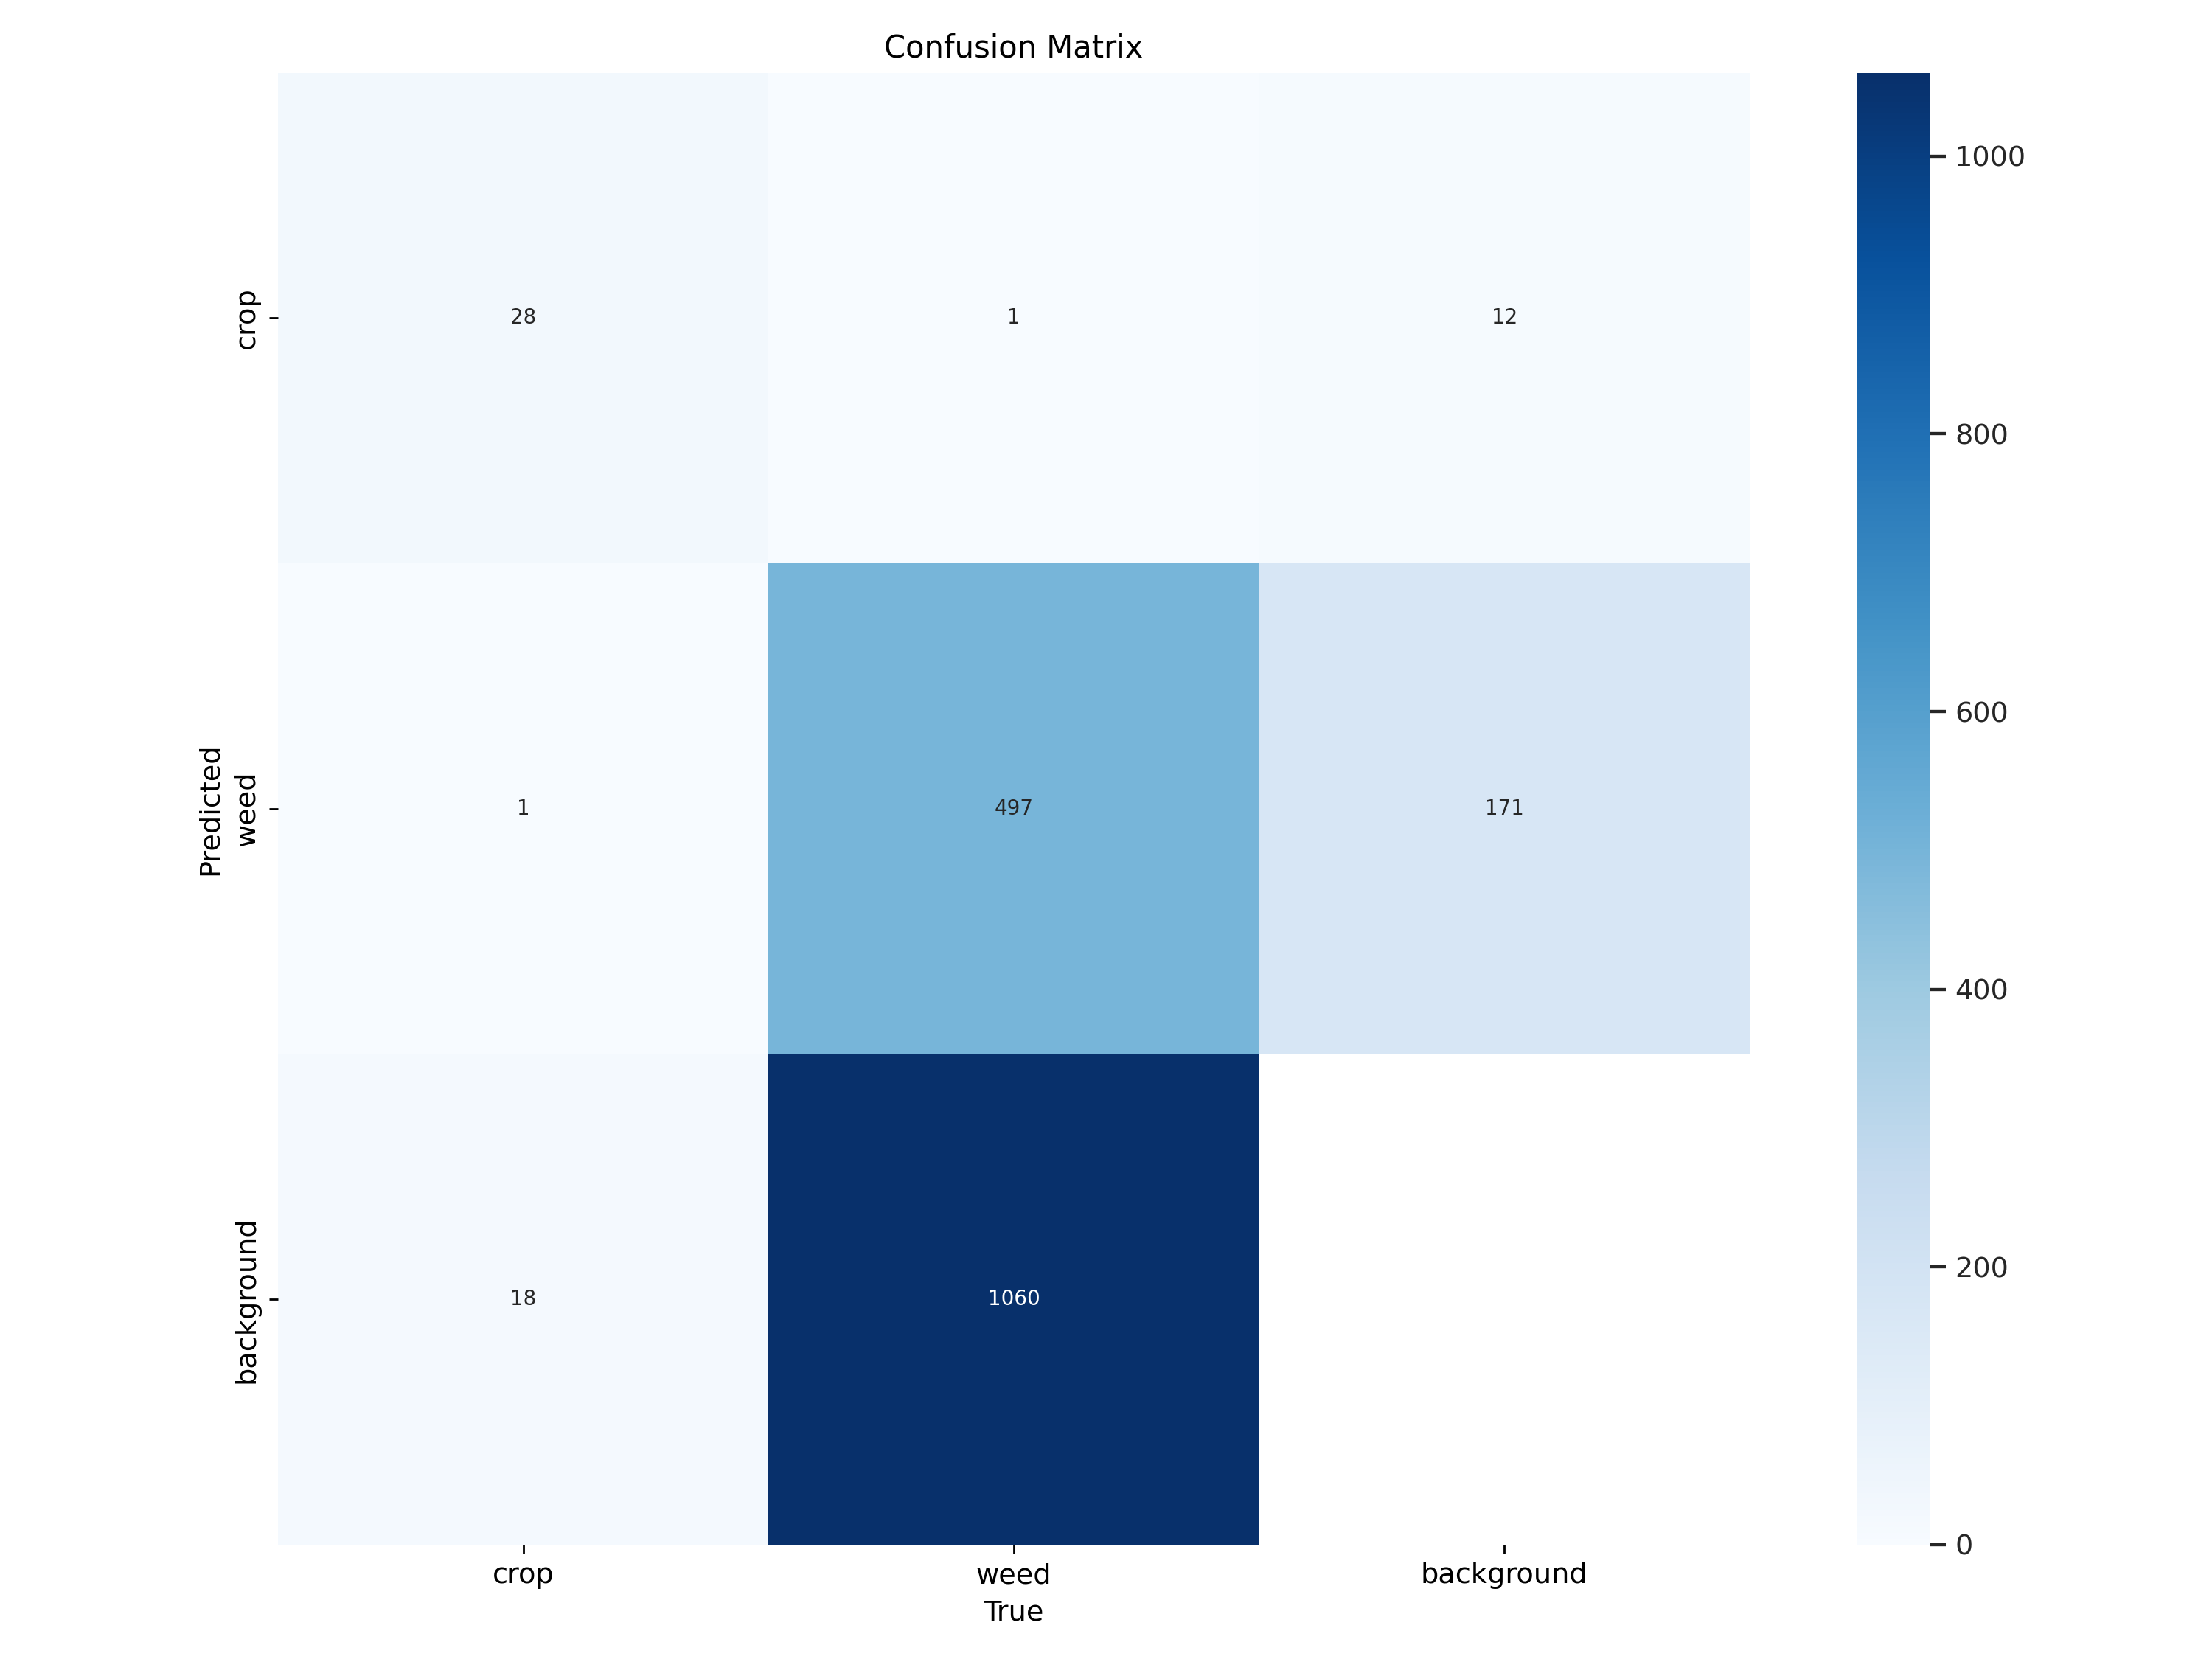

In [17]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=1000)

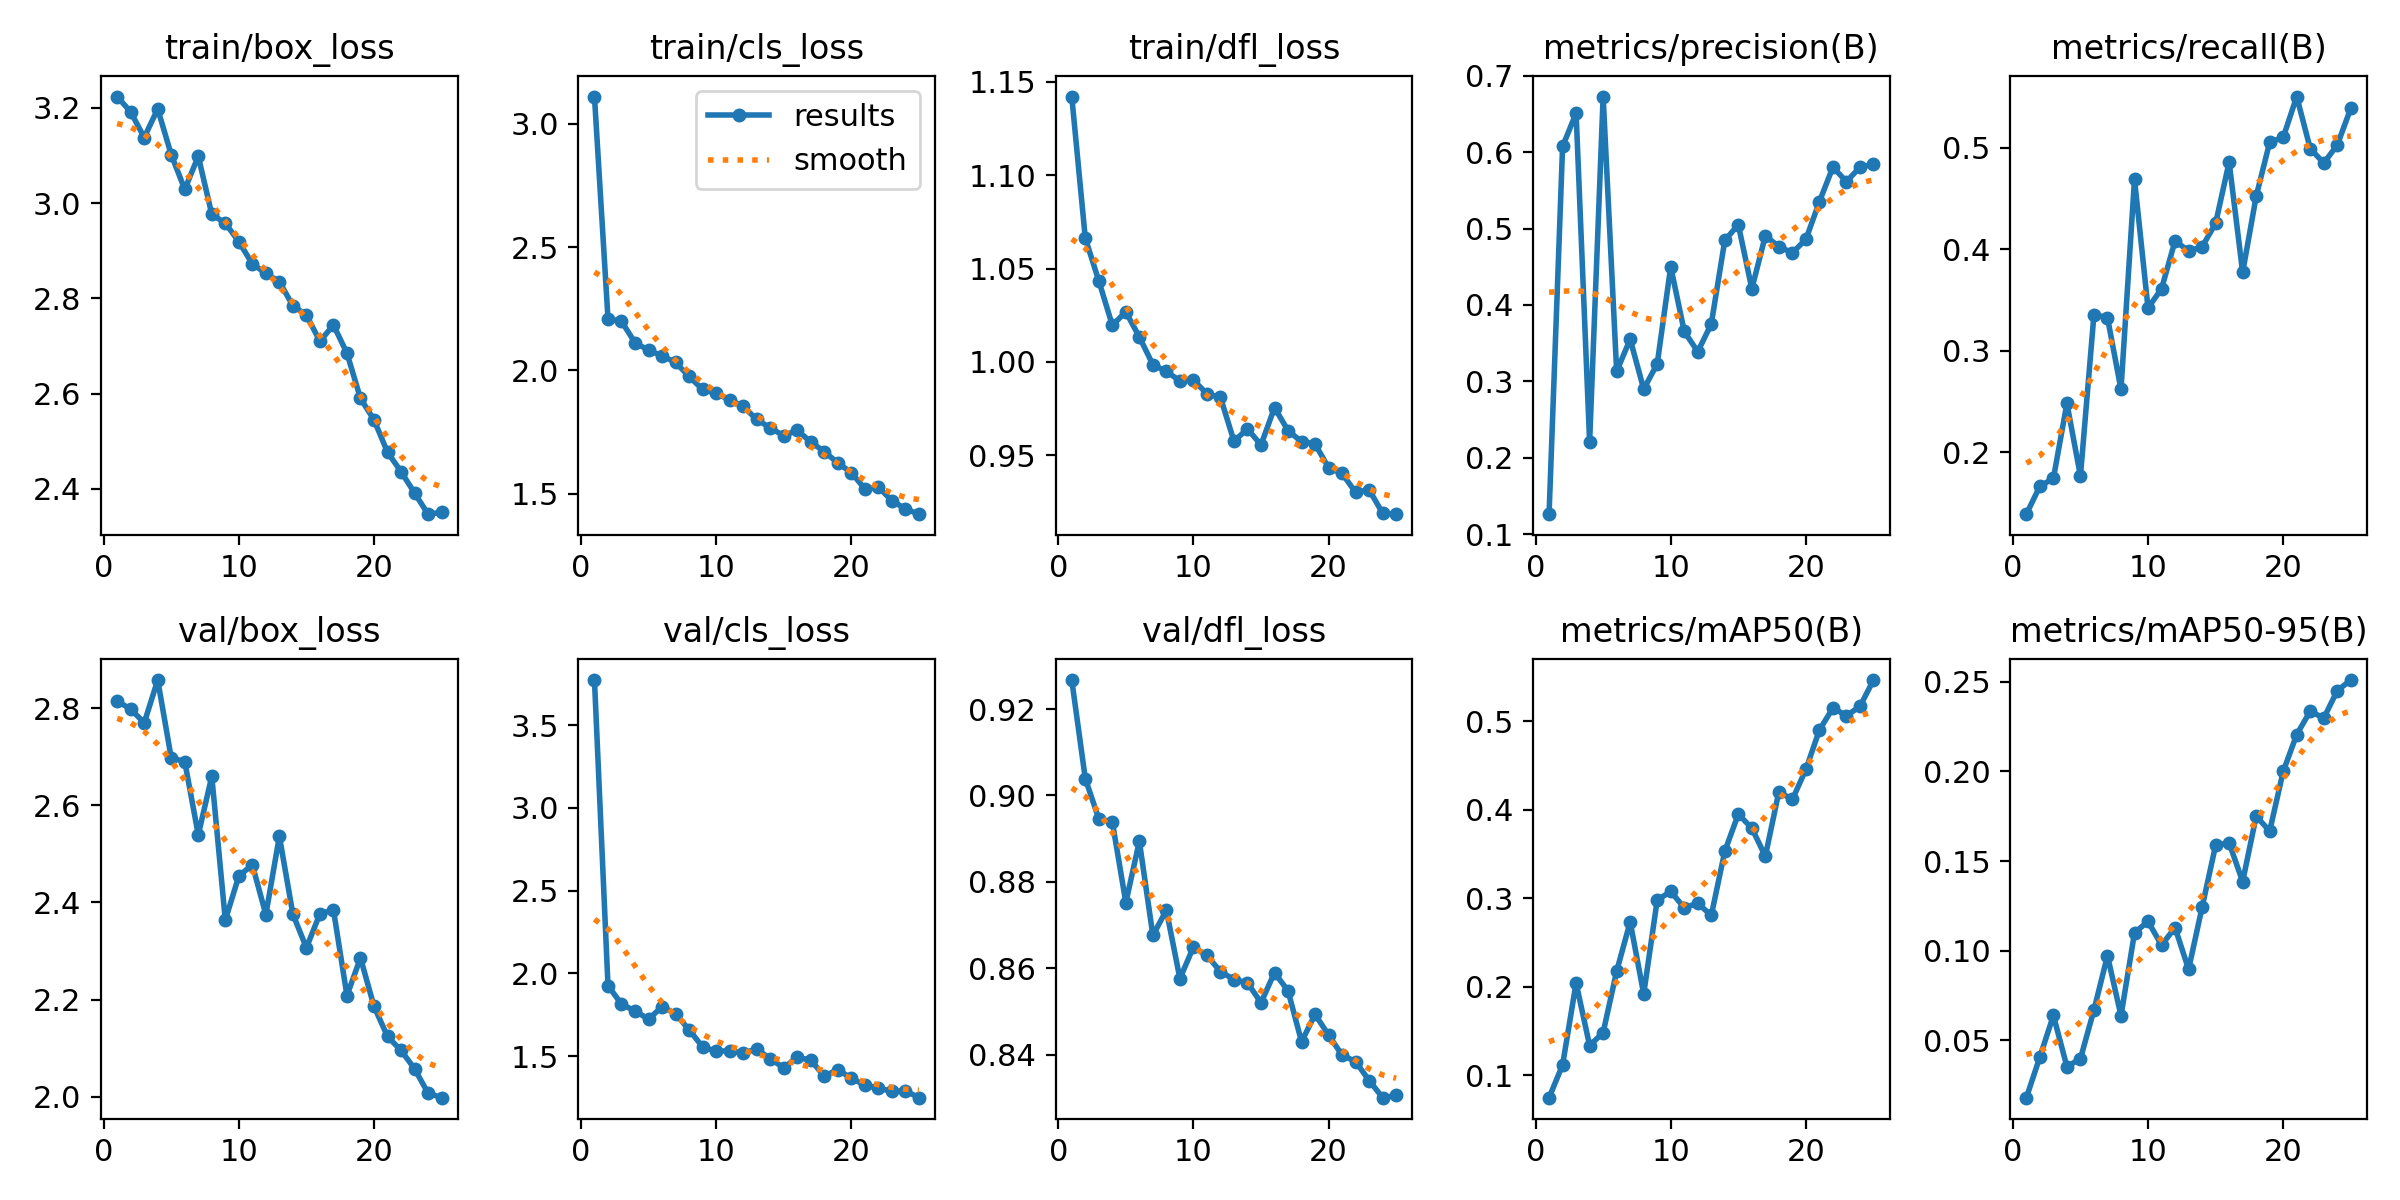

In [19]:
Image(filename='runs/detect/train2/results.png', width=800)

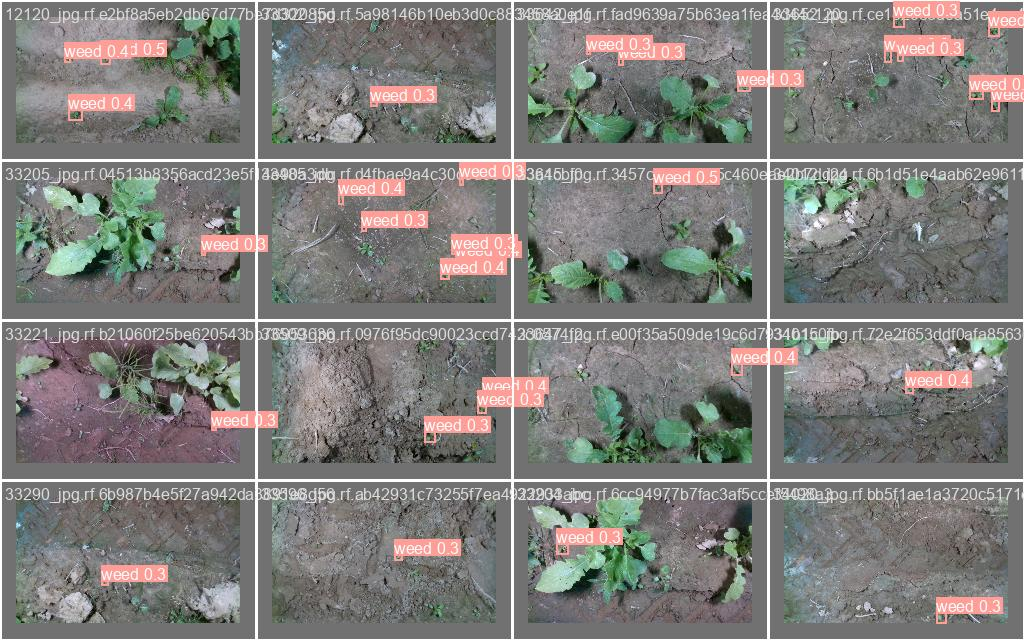

In [20]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=800)

In [21]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/valid/labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100% 235/235 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:09<00:00,  1.63it/s]
                   all        235       1605      0.583      0.539      0.547      0.256
                  crop        235         47      0.537      0.681      0.629      0.326
                  weed        235       1558       0.63      0.398      0.464      0.186
Speed: 0.4ms preprocess, 5.3ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [22]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/test/images/12122_jpg.rf.d7313af9bab0e80b7149ee0a3c32caf8.jpg: 128x224 2 weeds, 70.2ms
image 2/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/test/images/12198_jpg.rf.a216dcc7b89a168893ccd130a89553ee.jpg: 128x224 1 weed, 16.5ms
image 3/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/test/images/12205_jpg.rf.ab3db8b3b513ffeae1e66458ae3b1df9.jpg: 128x224 1 weed, 11.2ms
image 4/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/test/images/301_jpg.rf.e0a19ebd17c5738934d155d4747cecba.jpg: 128x224 (no detections), 9.5ms
image 5/118 /con

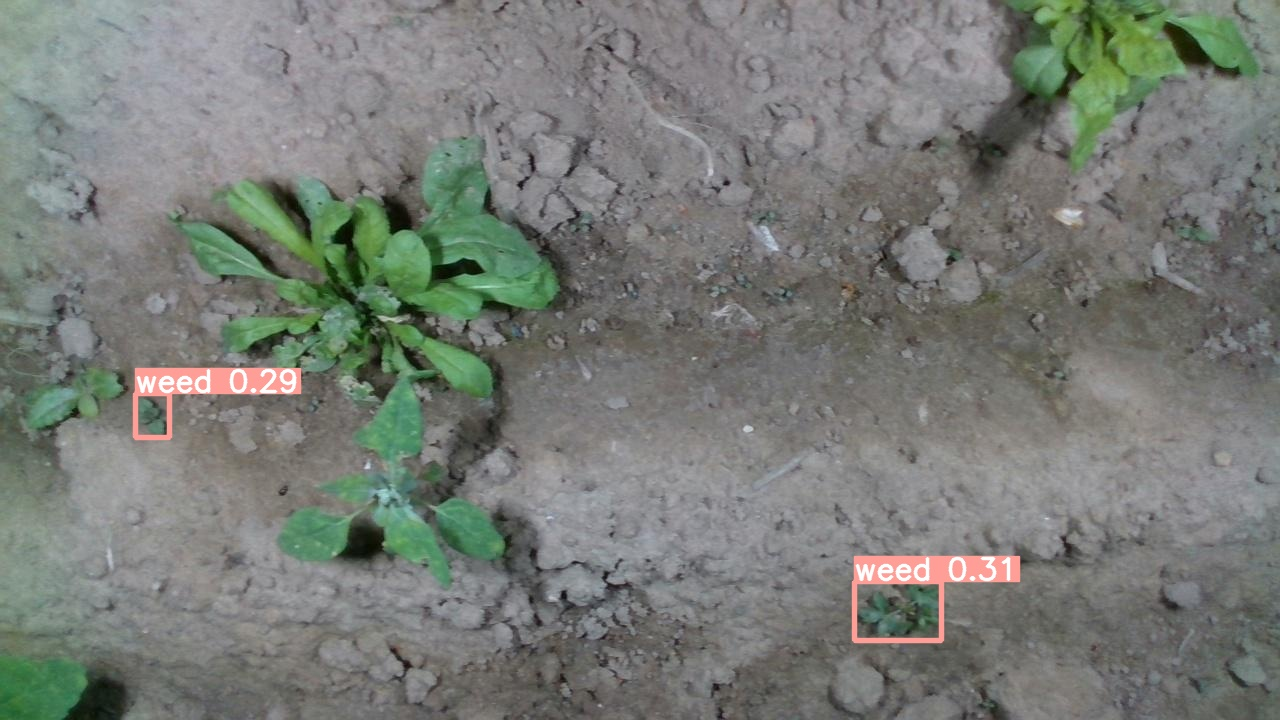

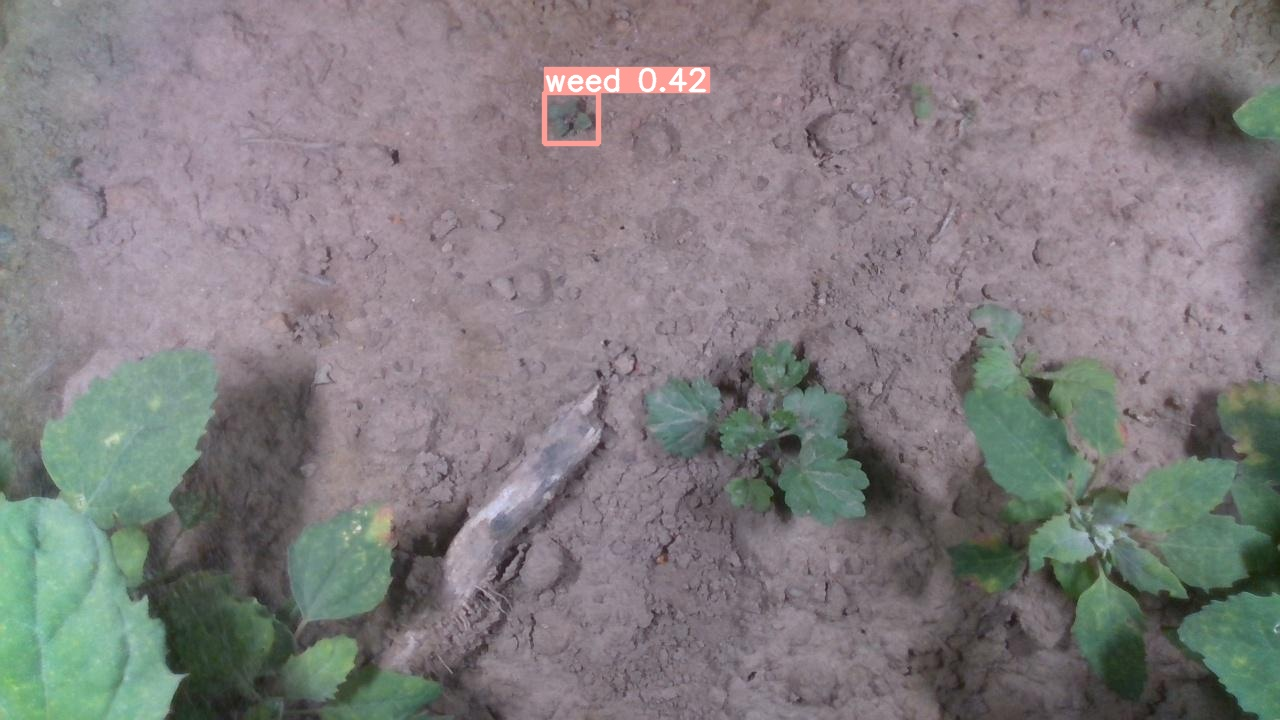

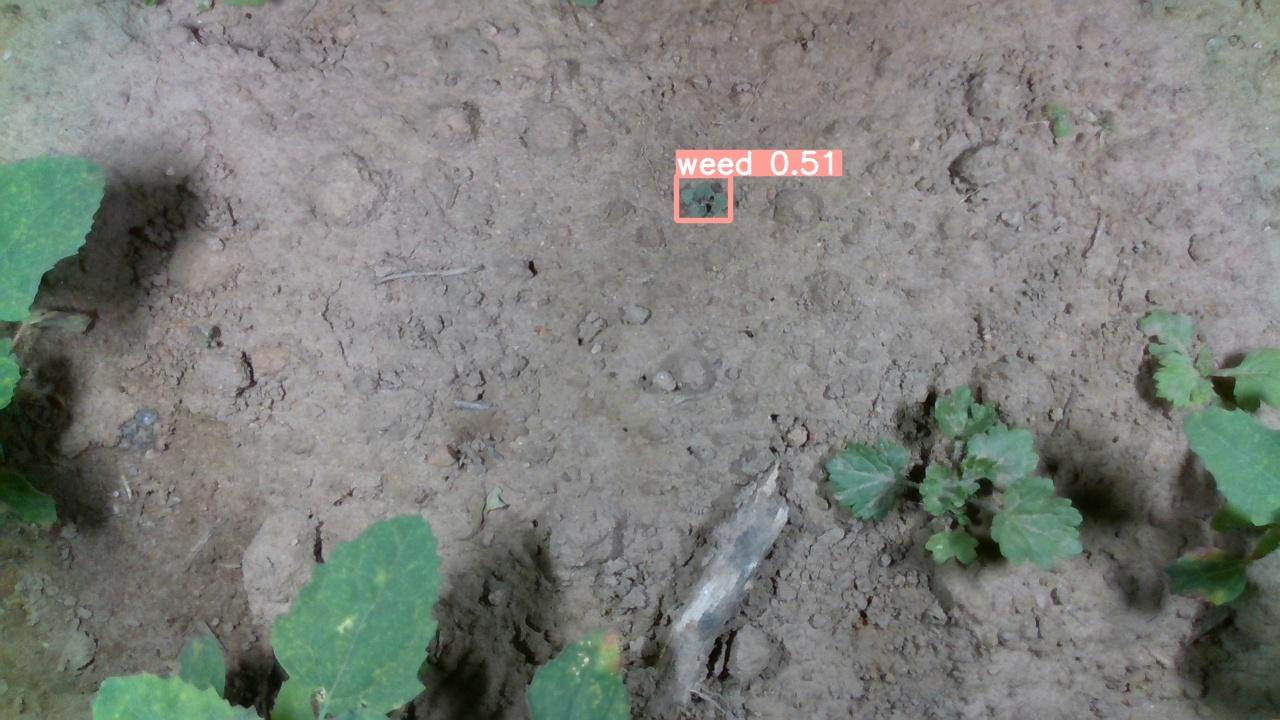

In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [24]:
%cd /content/drive/MyDrive/Weed Detection using YOLO

!yolo task=segment mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=224 plots=True

/content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO
WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fa

In [25]:
!ls runs/detect/train3

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1708078945.651b2647efb0.27161.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch6240.jpg  weights
P_curve.png					     train_batch6241.jpg
PR_curve.png					     train_batch6242.jpg


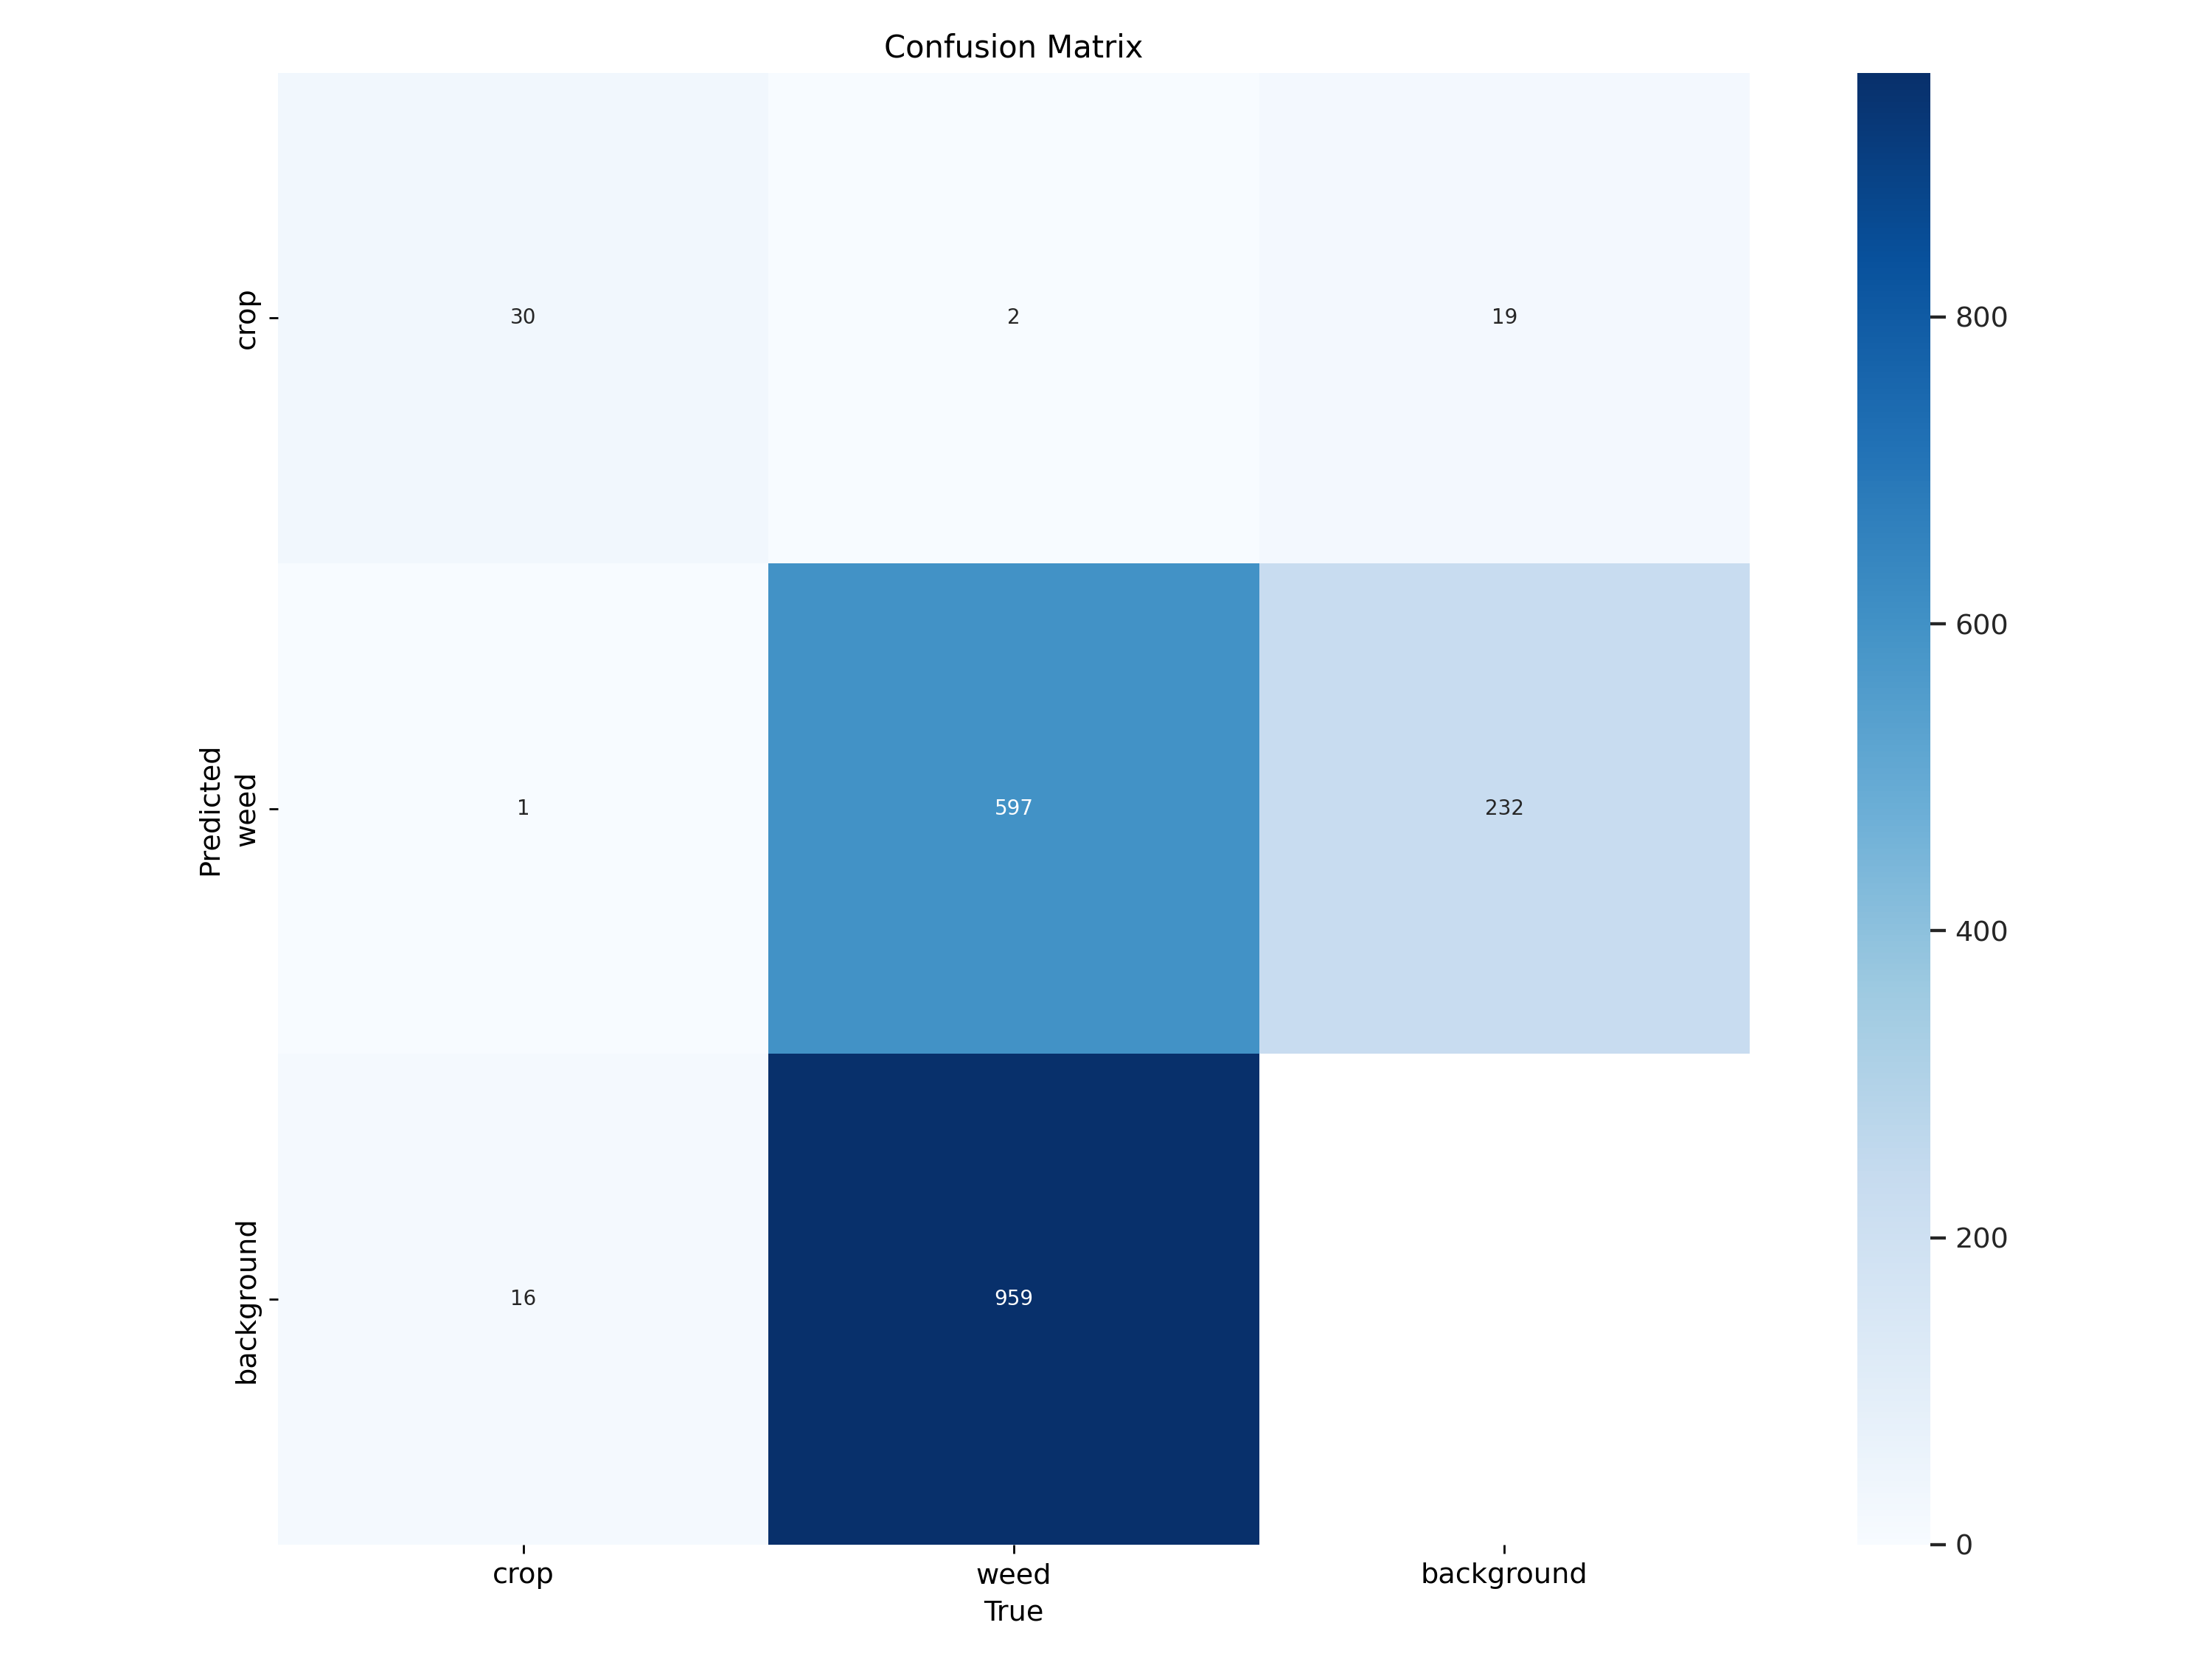

In [26]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=1000)

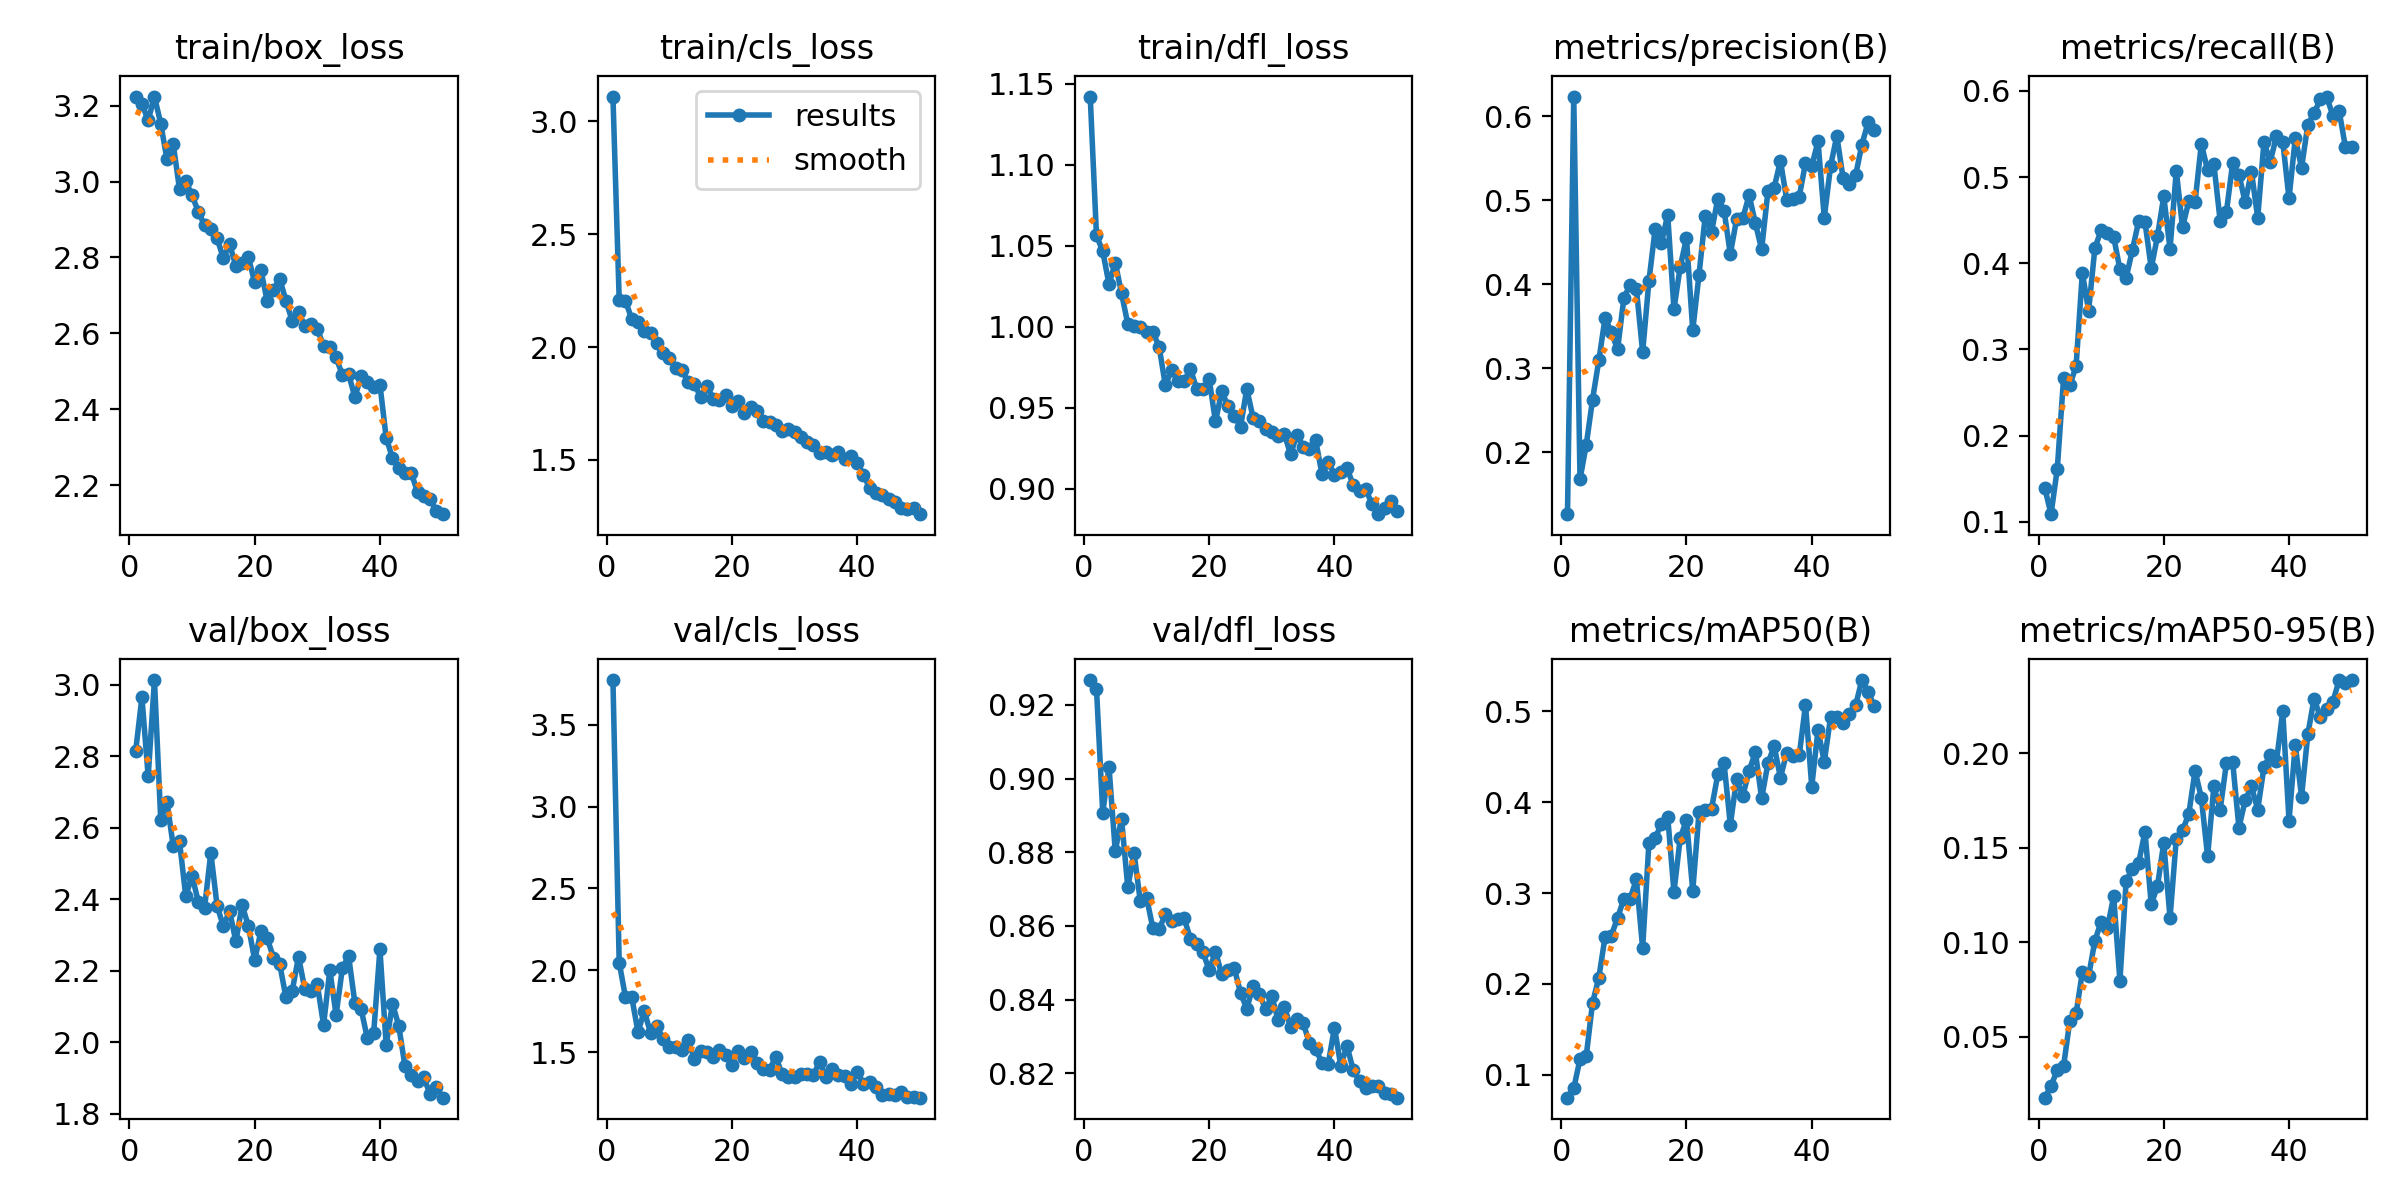

In [28]:
Image(filename='runs/detect/train3/results.png', width=1000)

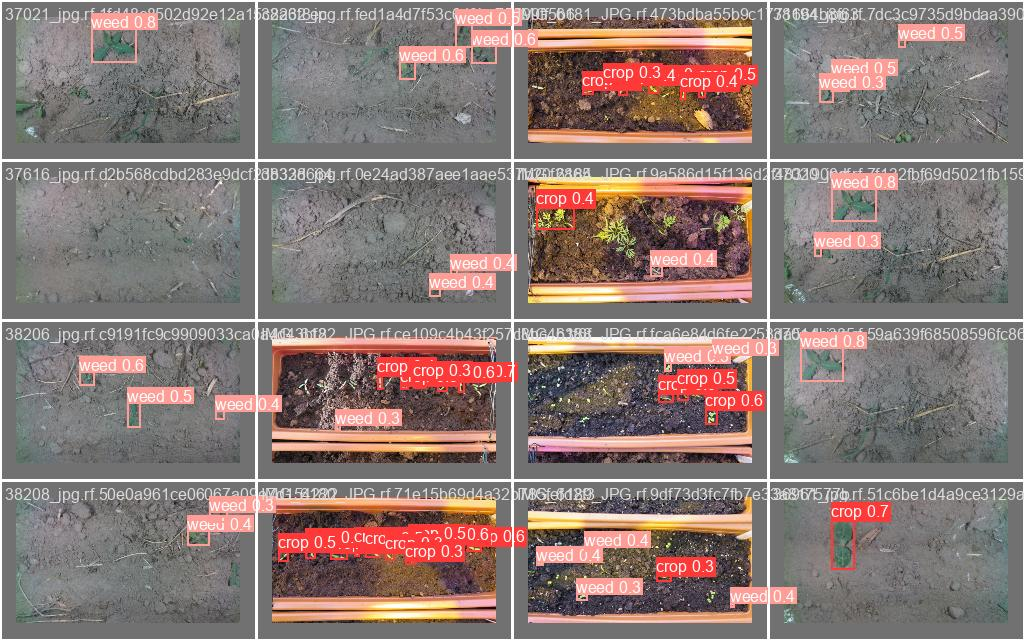

In [30]:
Image(filename='runs/detect/train3/val_batch2_pred.jpg', width=1000)

In [31]:
!yolo task=segment mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/valid/labels.cache... 235 images, 0 backgrounds, 0 corrupt: 100% 235/235 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:08<00:00,  1.84it/s]
                   all        235       1605      0.571      0.578      0.534       0.24
                  crop        235         47      0.519      0.702      0.582      0.269
                  weed        235       1558      0.622      0.453      0.487       0.21
Speed: 0.3ms preprocess, 5.4ms inference, 0.0ms loss, 7.6ms postprocess per image
Results 

In [32]:
!yolo task=segment mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=data/test/images

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/test/images/12122_jpg.rf.d7313af9bab0e80b7149ee0a3c32caf8.jpg: 128x224 1 weed, 98.5ms
image 2/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/test/images/12198_jpg.rf.a216dcc7b89a168893ccd130a89553ee.jpg: 128x224 2 weeds, 16.6ms
image 3/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k/Weed Detection using YOLO/data/test/images/12205_jpg.rf.ab3db8b3b513ffeae1e66458ae3b1df9.jpg: 128x224 1 weed, 7.5ms
image 4/118 /content/drive/.shortcut-targets-by-id/1UyCkWlC_jIDpPhBxboIQC5_jAkOsU26k

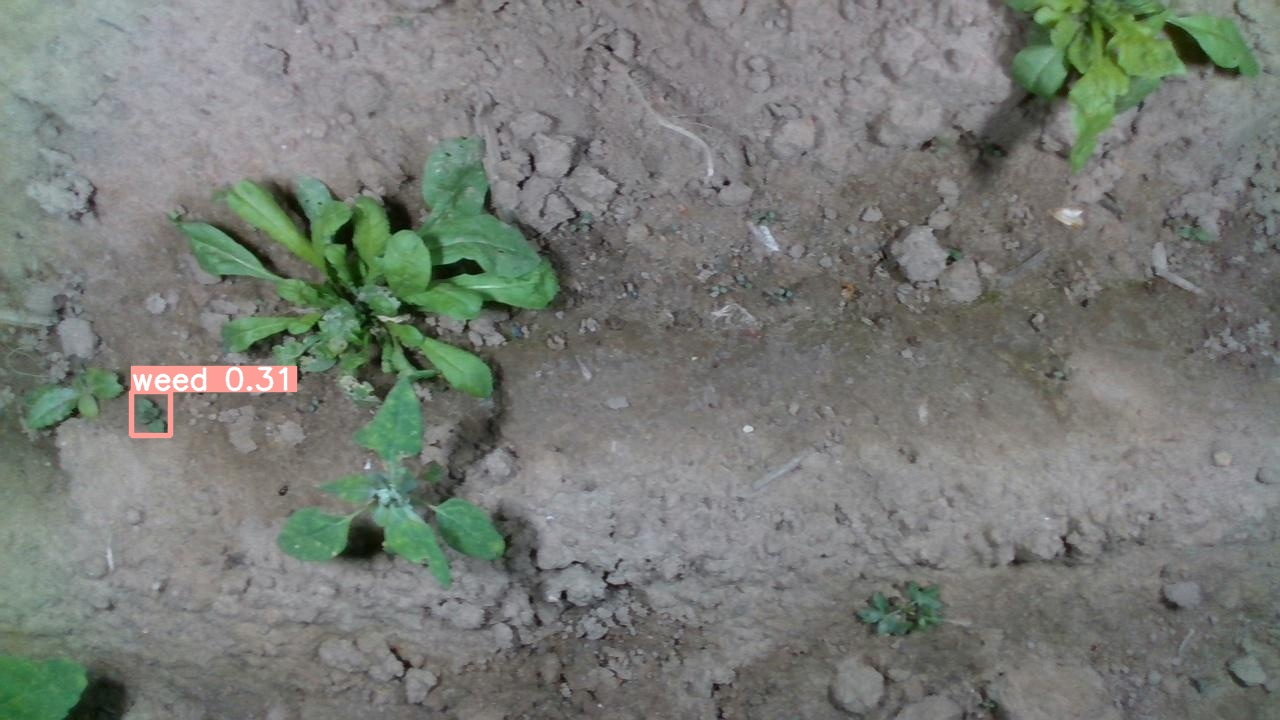

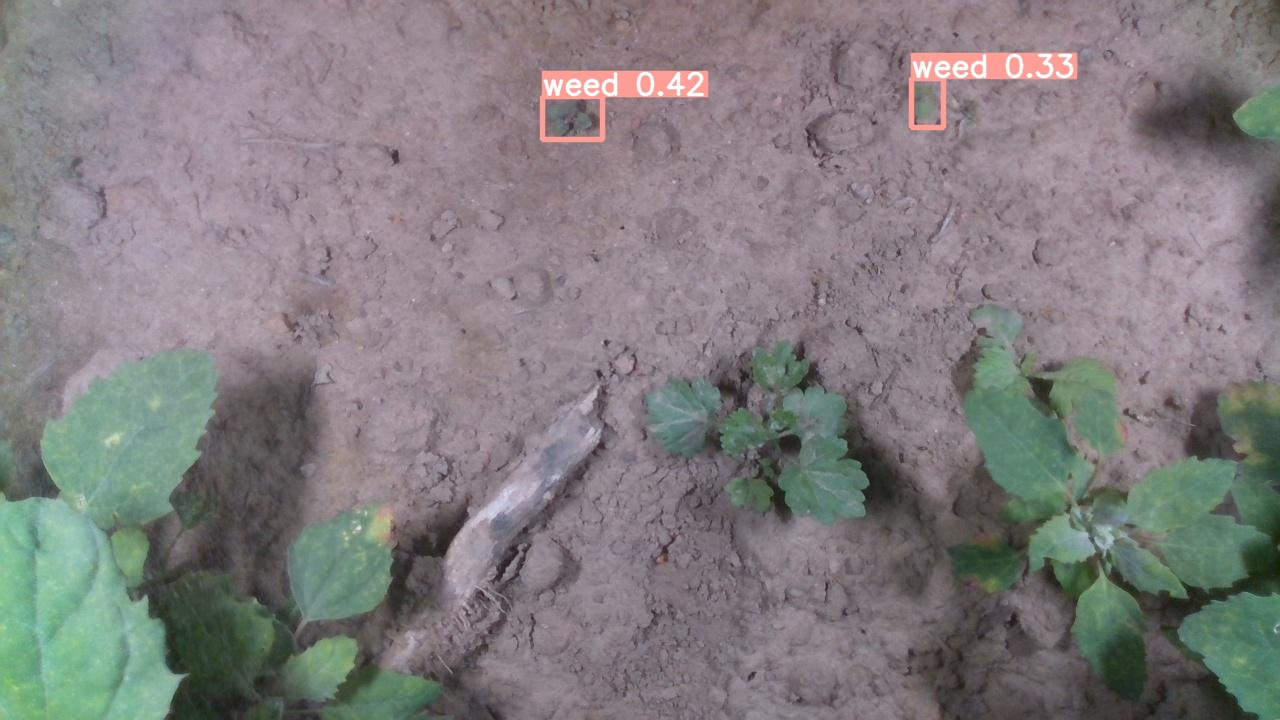

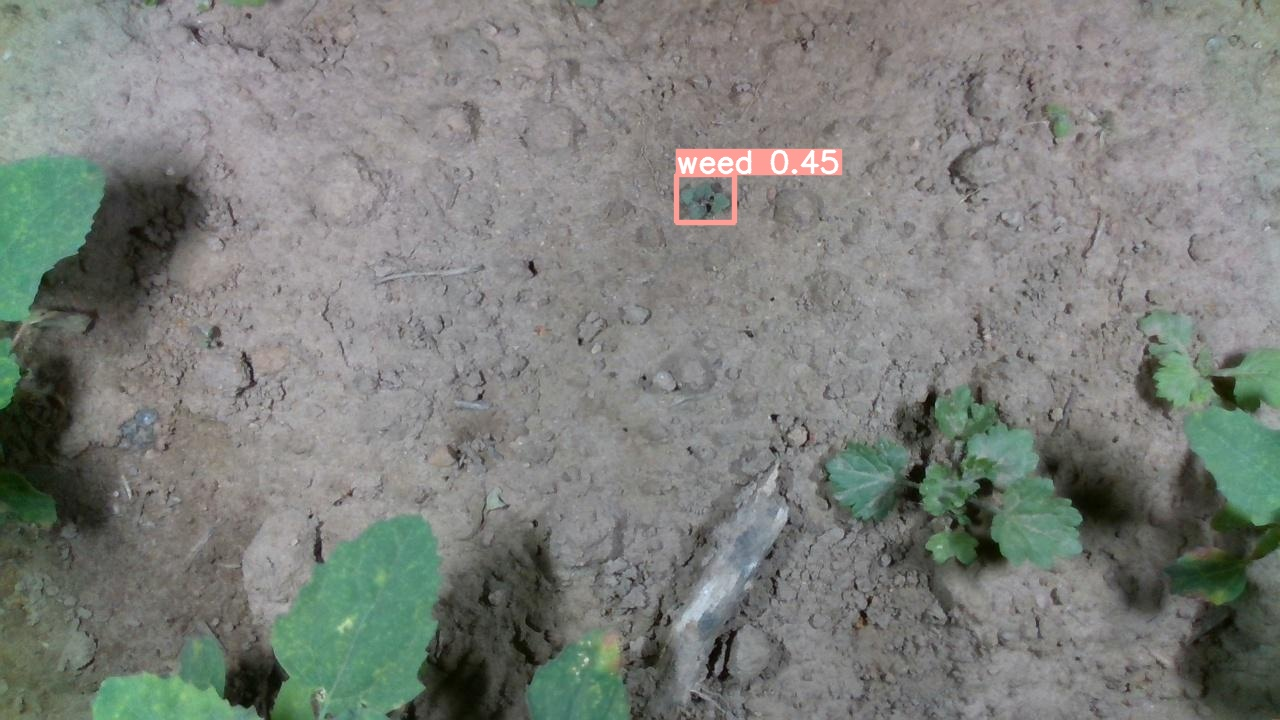

In [33]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [34]:
!yolo task=segment mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/img1.jpg

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/img1.jpg: 224x224 4 weeds, 24.8ms
Speed: 1.3ms preprocess, 24.8ms inference, 1061.9ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


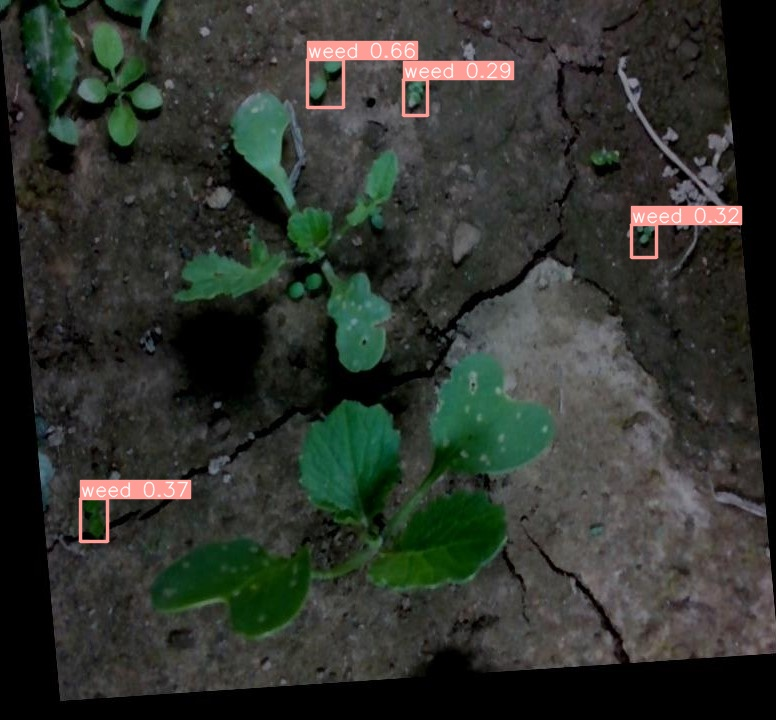

In [36]:
Image(filename='/content/drive/MyDrive/Weed Detection using YOLO/runs/detect/predict3/img1.jpg', width=600)